In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/ImageCendrawasih/DataCendrawasih/Train/'

In [ ]:
validation_dir = '/content/drive/MyDrive/ImageCendrawasih/DataCendrawasih/Valid/'

In [ ]:
test_dir = '/content/drive/MyDrive/ImageCendrawasih/DataCendrawasih/Test/'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 809 images belonging to 5 classes.
Found 201 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust output classes as needed
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 1.5405 - accuracy: 0.2921 - val_loss: 1.4220 - val_accuracy: 0.3906
Epoch 2/20
25/25 [==============================] - 45s 2s/step - loss: 1.3838 - accuracy: 0.3938 - val_loss: 1.2984 - val_accuracy: 0.4062
Epoch 3/20
25/25 [==============================] - 45s 2s/step - loss: 1.1445 - accuracy: 0.5495 - val_loss: 1.0340 - val_accuracy: 0.5781
Epoch 4/20
25/25 [==============================] - 43s 2s/step - loss: 0.9257 - accuracy: 0.6589 - val_loss: 0.9046 - val_accuracy: 0.6667
Epoch 5/20
25/25 [==============================] - 45s 2s/step - loss: 0.6802 - accuracy: 0.7477 - val_loss: 0.9922 - val_accuracy: 0.6562
Epoch 6/20
25/25 [==============================] - 45s 2s/step - loss: 0.6155 - accuracy: 0.7735 - val_loss: 0.7494 - val_accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 45s 2s/step - loss: 0.5061 - accuracy: 0.8044 - val_loss: 0.8069 - val_accuracy: 0.7135
Epoch 8/20
25/25 [==

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

7/7 [==============================] - 3s 401ms/step - loss: 0.9587 - accuracy: 0.8109
Validation Accuracy: 81.09%


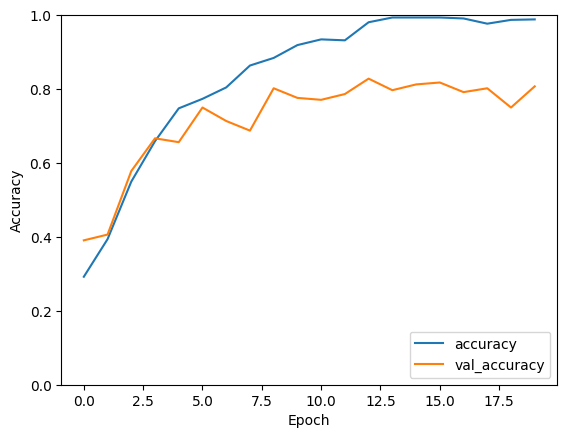

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values
    return img_array

In [ ]:
def predict_image(model, img_array):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

In [ ]:
def display_results(predicted_class):
    class_labels = ["Cendrawasih towa cemerlang", "Cendrawasih kuning kecil", "Cendrawasih mati kawat", "Cendrawasih raja", "Cendrawasih merah"]
    print("Predicted class:", class_labels[predicted_class])

In [ ]:
model.save('/content/drive/MyDrive/ImageCendrawasih/Cendrawasih.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tf.keras.Model.save

<function keras.src.engine.training.Model.save(self, filepath, overwrite=True, save_format=None, **kwargs)>

In [ ]:
model.save('/content/drive/MyDrive/ImageCendrawasih/Cendrawasih.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ImageCendrawasih/Cendrawasih.h5')

In [ ]:
input_image_path = '/content/drive/MyDrive/ImageCendrawasih/DataCendrawasih/Train/CendrawasihRaja/480 (60).jpg'  # Replace 'your_input_image.jpg' with the path to your input image
input_img_array = preprocess_image(input_image_path)

In [ ]:
predicted_class = predict_image(model, input_img_array)

1/1 [==============================] - 0s 103ms/step


In [ ]:
display_results(predicted_class)

Predicted class: Cendrawasih raja


Saving burung2.jpg to burung2 (3).jpg
1/1 [==============================] - 0s 71ms/step


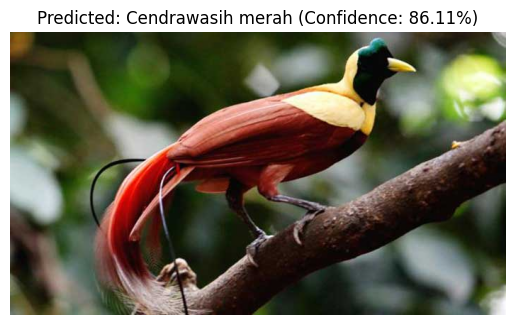

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Define your class labels
class_labels = ["Cendrawasih merah", "Cendrawasih kuning kecil", "Cendrawasih mati kawat", "Cendrawasih raja", "Cendrawasih towa cemerlang"]

# Load your trained model
model = keras.models.load_model('/content/drive/MyDrive/ImageCendrawasih/Cendrawasih.h5')

# Define image dimensions
img_width, img_height = 150, 150

# Function to preprocess the uploaded image
def preprocess_uploaded_image(uploaded_img):
    img = Image.open(uploaded_img)
    img = img.resize((img_width, img_height))  # Resize to match input size of the model
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict class and confidence
def predict_class_and_confidence(uploaded_img):
    img = preprocess_uploaded_image(uploaded_img)
    predictions = model.predict(img)
    predicted_index = np.argmax(predictions)
    confidence = np.max(predictions) * 100  # Convert confidence to percentage
    predicted_label = class_labels[predicted_index]
    return predicted_label, confidence

# Upload an image
uploaded = files.upload()

# Get the uploaded image filename
uploaded_img_filename = list(uploaded.keys())[0]

# Predict class and confidence
predicted_label, confidence = predict_class_and_confidence(uploaded_img_filename)

# Display the image
img = Image.open(uploaded_img_filename)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted: {predicted_label} (Confidence: {confidence:.2f}%)')
plt.show()


In [ ]:
tf.keras.Model.save

<function keras.src.engine.training.Model.save(self, filepath, overwrite=True, save_format=None, **kwargs)>

In [ ]:
model.save('/content/drive/MyDrive/ImageCendrawasih/CendrawasihBaru.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
